In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2023-08-21 10:12:48.680630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


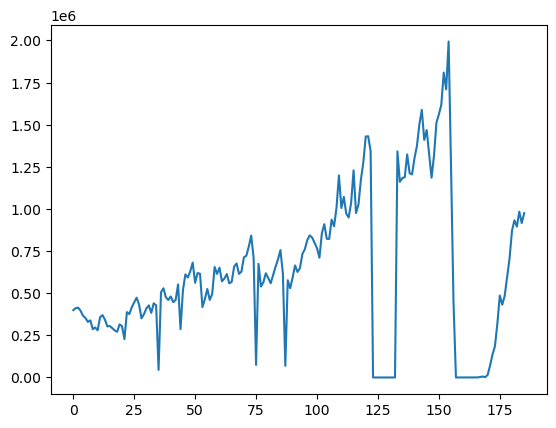

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES - DATA COMPOSITION 4 (Fixed Test Set).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [4]:
train_size = 133
validation_size = 13
test_size = 40

In [5]:
train = df1[0:133, :]
train.shape

(133, 1)

In [6]:
validation = df1[133:146, :]
validation.shape

(13, 1)

In [7]:
test = df1[146:186, :]
test.shape

(40, 1)

In [8]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [10]:
x_test, y_test = get_data(test, look_back)

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [12]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(96, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.0005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

2023-08-21 10:12:51.636892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
131/131 [==============================] - 2s 2ms/step - loss: 0.0506
Epoch 2/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 3/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 4/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 5/50
131/131 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 6/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 7/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 8/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 9/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 10/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 11/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 12/50
131/131 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 13/50
131/131 [====

In [13]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 9ms/step


In [14]:
scaler.scale_

array([5.01473077e-07])

In [15]:
y_pred = scaler.inverse_transform(y_pred)

In [16]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [17]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 220722.18601212054


In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 157805.2619243421


In [20]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.7683762446641565e+20


In [21]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 84.48240135463817


In [22]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_14707/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


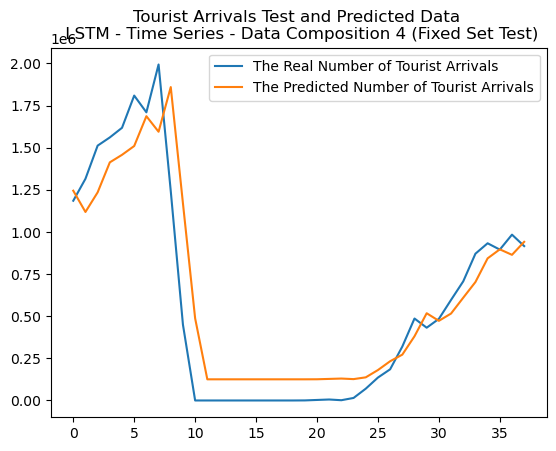

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()